In [2]:
!pip3 install saxpy

    100% |████████████████████████████████| 184kB 3.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for saxpy ... done
  Stored in directory: /root/.cache/pip/wheels/68/d1/a0/a2a4f96eb82607654bc45f00479af34ddd7c45be9096b8e63c
Successfully built saxpy


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from pmdarima.arima import auto_arima
import multiprocessing as mp
import saxpy

sns.set(rc={'figure.figsize':(11.7,8.27)})

## Reading the datasets

df1 = pd.read_csv("data/BATADAL_dataset03.csv")
df2 = pd.read_csv("data/BATADAL_dataset04.csv")
df2.columns = df2.columns.str.replace(" ", "")
dftest = pd.read_csv("data/BATADAL_test_dataset.csv")

In [159]:
from saxpy.sax import sax_via_window
from saxpy.alphabet import cuts_for_asize
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string

dat = df1['L_T1'].values

amount_of_levels = 3
window_size = 2

discrete_signal = []
for t in range(len(dat)-window_size):
    dat_znorm = znorm(dat[t:t+window_size])
    discrete_signal.append(ts_to_string(dat_znorm, cuts_for_asize(amount_of_levels)))
    

In [160]:
## Count the occurences of different words
word_counts = pd.Series(discrete_signal).value_counts()

['ca', 'ca', 'bb', 'ac', 'ac']


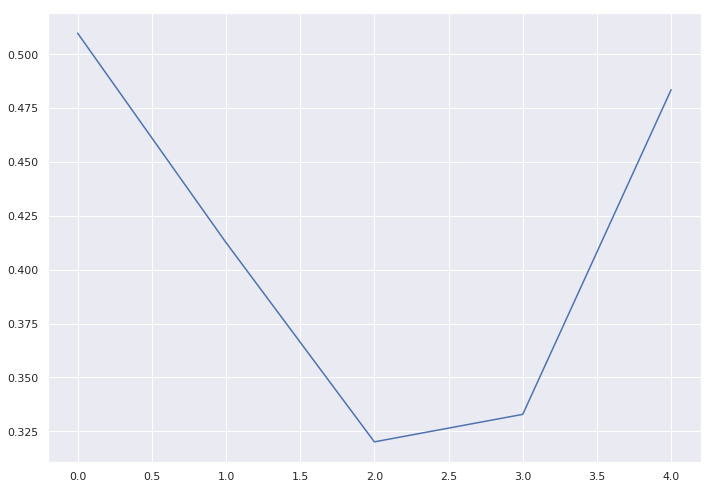

In [161]:
## Show example:
print(discrete_signal[0:5])
sns.lineplot(data=dat[0:5])

In [162]:
## Create a string out of it:
ts_string = " ".join(discrete_signal)

In [163]:
import nltk
from nltk import bigrams
from nltk import trigrams


In [164]:
## Creating tokens and do n-gram stuff

tokens = nltk.word_tokenize(ts_string)
bi_tokens = bigrams(tokens)
tri_tokens = trigrams(tokens)
fdist = nltk.FreqDist(tri_tokens)
trigram_df = pd.DataFrame.from_dict(fdist.items())

In [165]:
trigram_df.sort_values(1, ascending=False)

,0,1
14,"(ca, ca, ca)",2934
3,"(ac, ac, ac)",2882
12,"(ac, ac, ca)",391
13,"(ac, ca, ca)",374
11,"(ca, ac, ac)",341
10,"(ca, ca, ac)",322
15,"(ca, ca, cc)",223
18,"(cc, ac, ac)",204
9,"(cc, ca, ca)",174
17,"(ca, cc, ac)",160
